In [15]:
import matplotlib.pyplot as plt 
import numpy as np
from okadafull import displacement
plt.style.use('seaborn-bright')


In [3]:
# station
xs,ys,zs = [0., 0., 0.]

# tensile fault
# center 
xc,yc,zc = [0., 0., 3e3]
width = 1e3
length = 1e3 
strike = 0. 
dip = 0. 
ss = 0. # strike slip displ
ds = 0. # dip slip displ
ts = 1. # tensile displ

displacement(xs, ys, zs, xc, yc, zc, width, length, strike, dip, ss, ds, ts)

array([[0.       , 0.       , 0.0507021]])

In [10]:
# Champ de déplacement en surface
L = 10e3 
X = np.linspace(-L/2,L/2,100)
Y = np.linspace(-L/2,L/2,100)
XX,YY = np.meshgrid(X,Y)
ZZ = np.zeros((100,100))

Uxyz = displacement(XX.flatten(), YY.flatten(), ZZ.flatten(), xc, yc, zc, width, length, strike, dip, ss, ds, ts)

In [13]:
Uxyz = Uxyz.reshape((100,100,3))

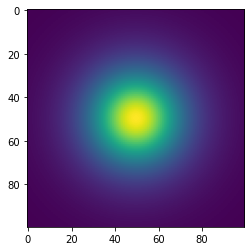

In [17]:
plt.imshow(Uxyz[:,:,2])

In [21]:
# Comparaison deux chambres Okada (sill) vs deux chambre Moggi (sphere)

# paramètres du milieu
nu = 0.25 
G  = 10e9
E = 2*G*(1+nu)

# profondeur des deux chambres
z1,z2 = 4e3,5e3 # 4 et 5 km de profondeur

# surpression dans les chambres
dp = 1e5 # 0.1 MPa

# volume des chambres 
# on fixe l'extension horizontale des chambres en sill
l_okada = 1e3
# on calcul alors l'épaisseur associée à cette supression (approx chambre elliptique)
e_okada = dp * 2*l_okada*(1-nu**2)/E
# on calcule le rayon des chambres de moggi pour avoir le même volume de magma
r_moggi = (l_okada**2*e_okada * 3/(4*np.pi))**(1/3)
r_moggi

# -> epaisseur bcp trop faible ???

12.142950315026402

In [23]:
E

25000000000.0

In [24]:
2*100*0.75*1e5/25e9

0.0006